## **LEAD SCORING CASE STUDY**


**PROBLEM STATEMENT**

An education company named X Education sells online courses to industry professionals.Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. The objective is to build a model to identify the hot/potential leads and achieve lead conversion rate to 80%

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew   
import statsmodels

In [3]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [4]:
# Loading the data
lead_score = pd.read_csv('/content/drive/MyDrive/Lead Scoring Assignment/Leads.csv')

##**1.Loading and Cleaning the data**

***a.Reading the data***

In [5]:
#reading the data
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**b.Inspect the DataFrame**

In [6]:
#info gives the information about data type, null values
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#total rows and columns of the data frame
lead_score.shape

(9240, 37)

**Comment: There are total 9240 rows and 37 columns in the data frame**

In [8]:
#numerical/statistical information of total data frame
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**c.Cleaning the DataFrame**

In [9]:
#In the leadprofile column convert all values to lowercase for 'select'
lead_score = lead_score.applymap(lambda s:s.lower() if type(s) == str else s)

In [10]:
# Replacing 'Select' with NaN (Since it means no option is selected)
lead_score = lead_score.replace('select',np.nan)

In [11]:
# Checking if there are columns with one unique value since it won't affect our analysis
lead_score.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

So we have to drop unique valued columns which have 1 unique value - 'Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content

In [12]:
# Dropping unique valued columns
lead_scoree= lead_score.drop(['Magazine','Receive More Updates About Our Courses',
              'I agree to pay the amount through cheque','Get updates on DM Content',
              'Update me on Supply Chain Content'],axis=1)

In [13]:
# Checking the percentage of missing values

column_wise_null_percent=round(100*(lead_scoree.isnull().sum()/len(lead_scoree.index)), 2)
column_wise_null_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

Here we observe that there are more null values present in some of the columns which were more than 40%.
so we will drop these columns as they might disturb our analysis

In [14]:
#checking total columns in the dataframe

lead_scoree.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [15]:
#dropping the columns

Lead_score = lead_scoree.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index',
                                'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1)

Lead_score

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.00,...,no,no,no,no,no,no,interested in other courses,NaN,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.50,...,no,no,no,no,no,no,ringing,NaN,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,...,no,no,no,no,no,no,will revert after reading the email,mumbai,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.00,...,no,no,no,no,no,no,ringing,mumbai,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.00,...,no,no,no,no,no,no,will revert after reading the email,mumbai,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,...,no,no,no,no,no,no,will revert after reading the email,mumbai,no,email marked spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,landing page submission,direct traffic,no,no,0,2.0,238,2.00,...,no,no,no,no,no,no,wrong number given,mumbai,yes,sms sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,...,no,no,no,no,no,no,invalid number,mumbai,yes,sms sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,landing page submission,google,no,no,1,3.0,499,3.00,...,no,no,no,no,no,no,NaN,other metro cities,no,sms sent


Here we have dropped 7 Columns from data frame

In [16]:
Lead_score.shape

(9240, 25)

There are 25 columns remaining in the Data Frame

In [17]:
#checking the percentage of missing values

round(100*(Lead_score.isnull().sum(axis=0)/len(Lead_score.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

**There are more null variables in 6 columns, but we dont drop or remove these columns because these columns are important to our analysis. So instead of dropping them we will replace Nan values with 'others'. So we will have all the data without dropping**

In [18]:
# imputing null values with 'others'

Lead_score['Specialization'] = Lead_score['Specialization'].fillna('others') 
Lead_score['What matters most to you in choosing a course'] = Lead_score['What matters most to you in choosing a course'].fillna('others')
Lead_score['Country'] = Lead_score['Country'].fillna('others')
Lead_score['What is your current occupation'] = Lead_score['What is your current occupation'].fillna('others')
Lead_score['Tags'] = Lead_score['Tags'].fillna('others')
Lead_score['City'] = Lead_score['City'].fillna('others')

In [19]:
#checking the head of datafram after replacing with others
Lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,no,no,no,no,no,interested in other courses,others,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,no,no,no,no,no,ringing,others,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,no,no,no,no,no,will revert after reading the email,mumbai,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,no,no,no,no,no,ringing,mumbai,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,no,no,no,no,no,will revert after reading the email,mumbai,no,modified


In [20]:
#checking dataframes
Lead_score.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [21]:
#Checking again the percentage of missing values

round(100*(Lead_score.isnull().sum(axis=0)/len(Lead_score.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

d.Missing Value Imputation


In [22]:
# we will check the colums which are  having missing values less than 13%
column_wise_null_percent=((Lead_score.isna().sum(axis=0)/len(Lead_score))*100).round(2)

Col_ind = column_wise_null_percent.index # to know the index of each column. 

In [23]:

# collecting the all the columns having more than or equal to 1% and less than 10 % missing values

col_10 = []

for i in Col_ind:
    if column_wise_null_percent[i] >0 and column_wise_null_percent[i]<10:
        col_10.append(i) 
# list of columns having missing values more than or equal to 1% and less than 13%
print('The list of columns having missing values less than 10%: \n',col_10)

print('No. of columns having missing values less than 10%: ', len(col_10))


The list of columns having missing values less than 10%: 
 ['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']
No. of columns having missing values less than 10%:  4


In [24]:
# we will inspect the columns which have less than 10% missing values

Lead_score[col_10].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lead Source           9204 non-null   object 
 1   TotalVisits           9103 non-null   float64
 2   Page Views Per Visit  9103 non-null   float64
 3   Last Activity         9137 non-null   object 
dtypes: float64(2), object(2)
memory usage: 288.9+ KB


**There are two Categorical and two Numerical variables present for missing values less than 10%**

we will replace the values with mode and mean
categorical variables -'mode'  
numerical values with 'mean'

In [25]:
 Lead_score['TotalVisits'] = lead_score['TotalVisits'].fillna(Lead_score['TotalVisits'].mean())
Lead_score['Page Views Per Visit'] = lead_score['Page Views Per Visit'].fillna(Lead_score['Page Views Per Visit'].mean())

In [26]:
Lead_score['Lead Source'].mode()


0    google
dtype: object

In [27]:
Lead_score['Last Activity'].mode()


0    email opened
dtype: object

In [28]:
# impute the missing value with mode:
Lead_score['Lead Source'] = lead_score['Lead Source'].fillna('google')
Lead_score['Last Activity'] = lead_score['Last Activity'].fillna('email opened')


In [29]:

# Grouping the response which is have very less count:
Lead_score['Last Activity'] = Lead_score['Last Activity'].str.replace('had a phone conversation','others')
Lead_score['Last Activity'] = Lead_score['Last Activity'].str.replace('approached upfront','others')
Lead_score['Last Activity'] = Lead_score['Last Activity'].str.replace('view in browser link clicked','others')
Lead_score['Last Activity'] = Lead_score['Last Activity'].str.replace('email received','others')
Lead_score['Last Activity'] = Lead_score['Last Activity'].str.replace('email marked spam','others')
Lead_score['Last Activity'] = Lead_score['Last Activity'].str.replace('visited booth in tradeshow','others')
Lead_score['Last Activity'] = Lead_score['Last Activity'].str.replace('resubscribed to emails','others')

Lead_score['Last Activity'].value_counts()

email opened                 3540
sms sent                     2745
olark chat conversation       973
page visited on website       640
converted to lead             428
email bounced                 326
email link clicked            267
form submitted on website     116
unreachable                    93
unsubscribed                   61
others                         51
Name: Last Activity, dtype: int64

In [30]:
Lead_score['Last Notable Activity'].value_counts()


modified                        3407
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: Last Notable Activity, dtype: int64

In [31]:

# Grouping the response which is have very less count:
Lead_score['Last Notable Activity'] = Lead_score['Last Notable Activity'].str.replace('had a phone conversation','others')
Lead_score['Last Notable Activity'] = Lead_score['Last Notable Activity'].str.replace('email marked spam','others')
Lead_score['Last Notable Activity'] = Lead_score['Last Notable Activity'].str.replace('approached upfront','others')
Lead_score['Last Notable Activity'] = Lead_score['Last Notable Activity'].str.replace('email received','others')
Lead_score['Last Notable Activity'] = Lead_score['Last Notable Activity'].str.replace('email marked spam','others')
Lead_score['Last Notable Activity'] = Lead_score['Last Notable Activity'].str.replace('form submitted on website','others')
Lead_score['Last Notable Activity'] = Lead_score['Last Notable Activity'].str.replace('resubscribed to emails','others')
Lead_score['Last Notable Activity'] = Lead_score['Last Notable Activity'].str.replace('email marked spam','others')
Lead_score['Last Notable Activity'] = Lead_score['Last Notable Activity'].str.replace('view in browser link clicked','others')
Lead_score['Last Notable Activity'].value_counts()

modified                   3407
email opened               2827
sms sent                   2172
page visited on website     318
olark chat conversation     183
email link clicked          173
email bounced                60
unsubscribed                 47
unreachable                  32
others                       21
Name: Last Notable Activity, dtype: int64

In [32]:
round(100*(Lead_score.isnull().sum()/len(Lead_score.index)), 2)
#checking the percentage of missing values

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [33]:
Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [34]:
Lead_score.shape

(9240, 25)

In [35]:
# copying the data frame
Lead_1 = Lead_score

In [36]:
# Removing Id values since they are unique for everyone
Lead_final = Lead_1.drop('Prospect ID',1)
Lead_final.shape

(9240, 24)

## **2.Exploratory Data Analysis**


## **2.a Univariate Analysis**

**2.a.1Categorical Variables**

In [37]:
Lead_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

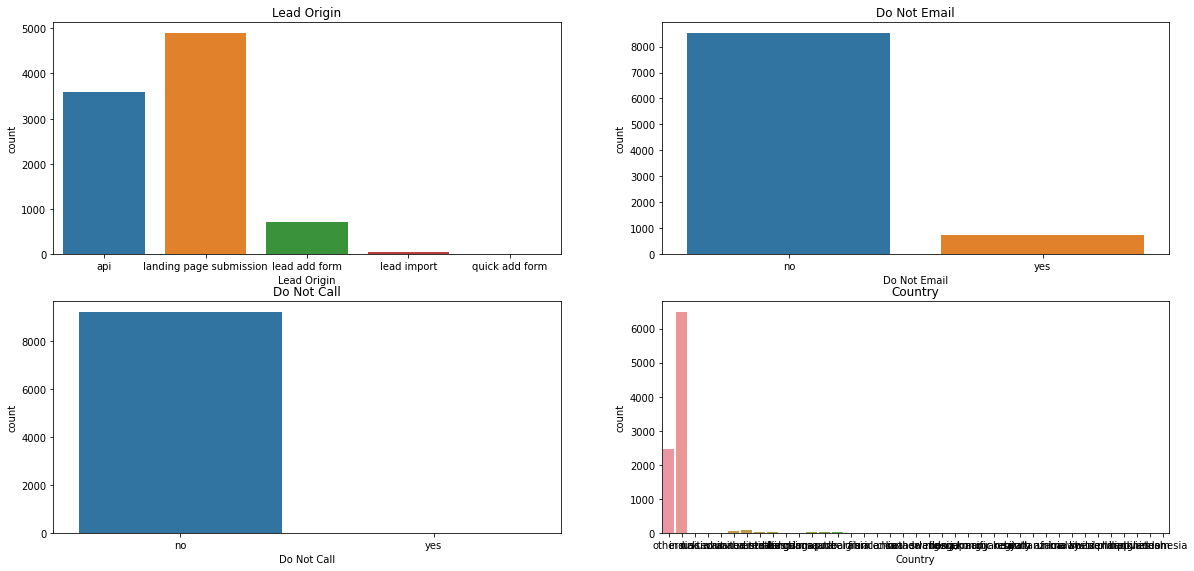

In [38]:
plt.figure(figsize = (20,35))

plt.subplot(7,2,1)
sns.countplot(Lead_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(7,2,2)
sns.countplot(Lead_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(7,2,3)
sns.countplot(Lead_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(7,2,4)
sns.countplot(Lead_final['Country'])
plt.title('Country')



plt.show()

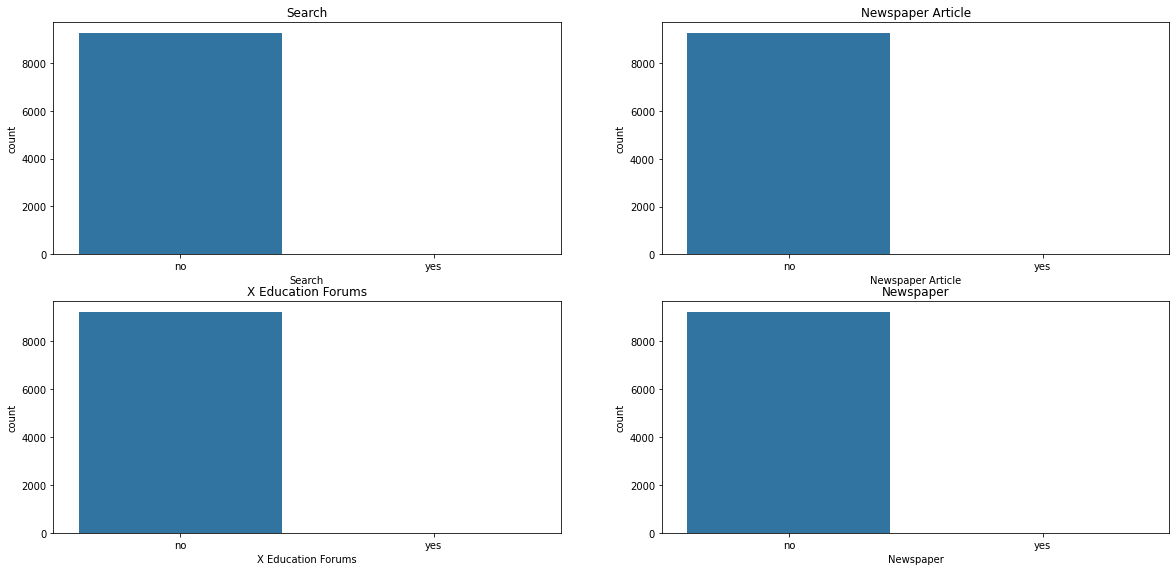

In [39]:
plt.figure(figsize = (20,35))


plt.subplot(7,2,5)
sns.countplot(Lead_final['Search'])
plt.title('Search')

plt.subplot(7,2,6)
sns.countplot(Lead_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(7,2,7)
sns.countplot(Lead_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(7,2,8)
sns.countplot(Lead_final['Newspaper'])
plt.title('Newspaper')



plt.show()

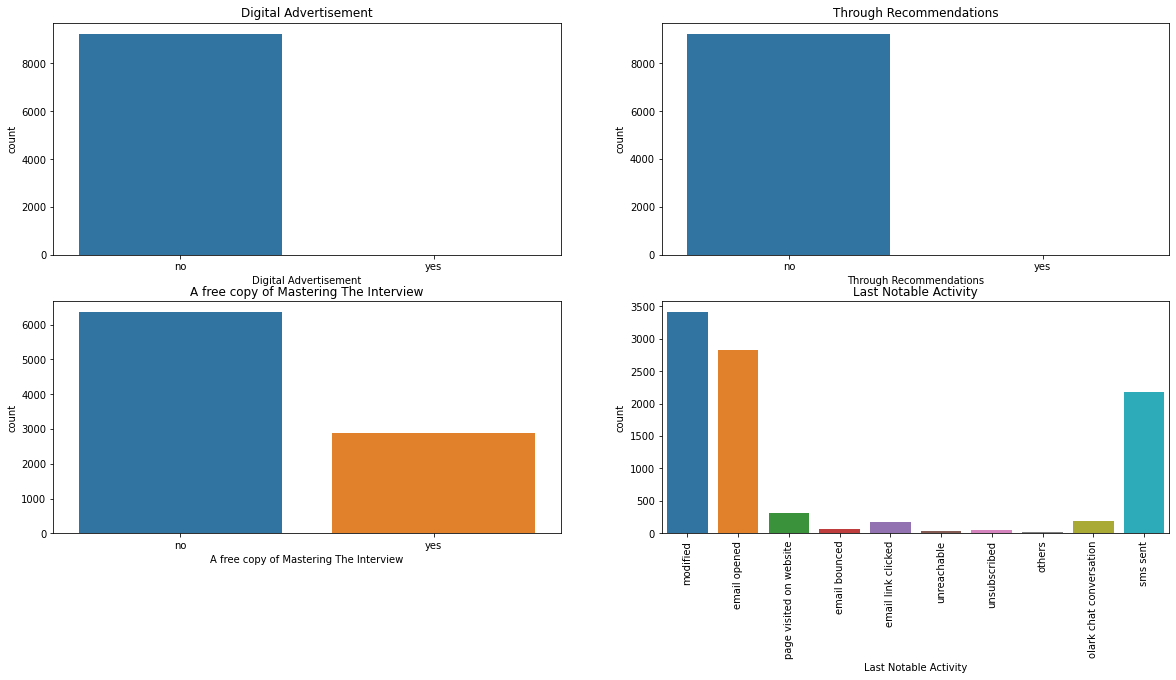

In [40]:
plt.figure(figsize = (20,35))


plt.subplot(7,2,9)
sns.countplot(Lead_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(7,2,10)
sns.countplot(Lead_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(7,2,11)
sns.countplot(Lead_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(7,2,12)
sns.countplot(Lead_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

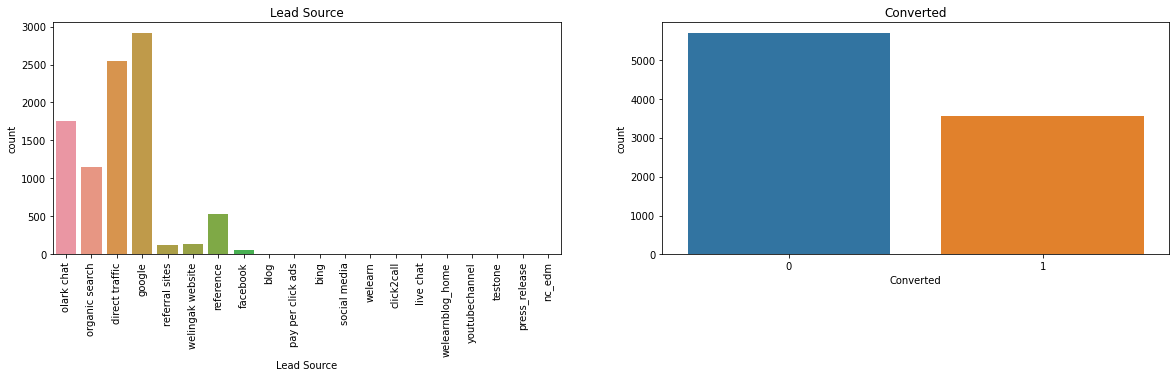

In [41]:
plt.figure(figsize = (20,35))


plt.subplot(7,2,13)
sns.countplot(Lead_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(7,2,14)
sns.countplot(lead_score['Converted'])
plt.title('Converted')

plt.show()

In [42]:
# Dropping Skew Columns:
Skew = ['Do Not Email','Do Not Call','Search','Newspaper Article','Newspaper',
        'X Education Forums','Digital Advertisement','Through Recommendations']
Lead_final = Lead_final.drop(Skew,axis = 1)

In [43]:
Lead_final.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,api,olark chat,0,0.0,0,0.0,page visited on website,others,others,unemployed,better career prospects,interested in other courses,others,no,modified
1,660728,api,organic search,0,5.0,674,2.5,email opened,india,others,unemployed,better career prospects,ringing,others,no,email opened
2,660727,landing page submission,direct traffic,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,will revert after reading the email,mumbai,yes,email opened
3,660719,landing page submission,direct traffic,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,ringing,mumbai,no,modified
4,660681,landing page submission,google,1,2.0,1428,1.0,converted to lead,india,others,unemployed,better career prospects,will revert after reading the email,mumbai,no,modified


In [44]:
Lead_final.info()
#checking dataframe after dropping skew columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

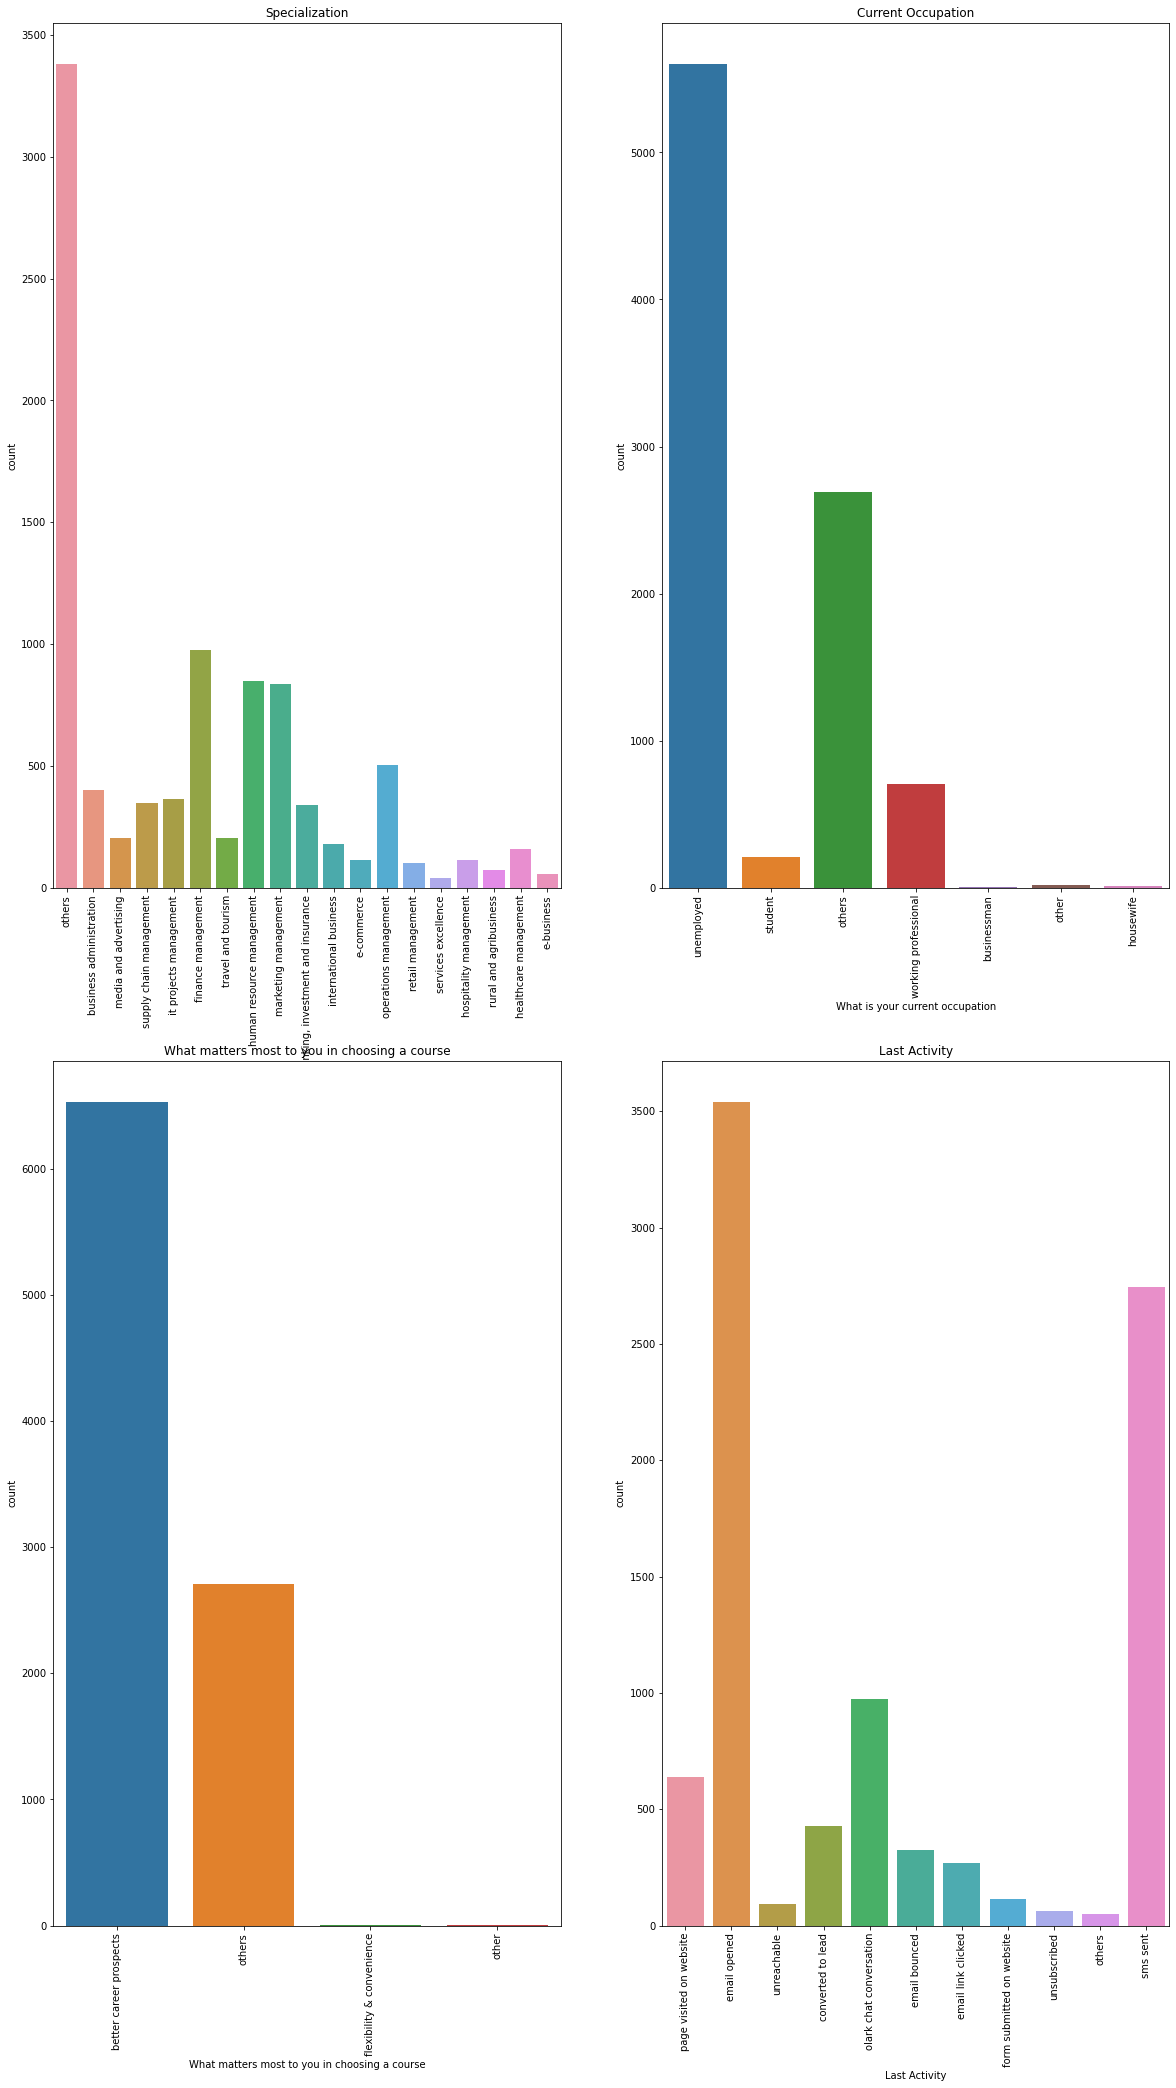

In [45]:
plt.figure(figsize = (20,35))

plt.subplot(2,2,1)
sns.countplot(Lead_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(Lead_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(2,2,3)
sns.countplot(Lead_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,4)
sns.countplot(Lead_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')


plt.show()

In [46]:
# Count of Customers Not converted that is 0
Lead_0 = Lead_1['Converted'][Lead_1['Converted'] == 0]
Lead_0.count()

5679

In [47]:
# Count of Customers converted into Paying Customers that is 1
Lead_2 = Lead_1['Converted'][Lead_1['Converted'] == 1]
Lead_2.count()

3561

**2.a.2 Numerical Variables**

In [48]:
Lead_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

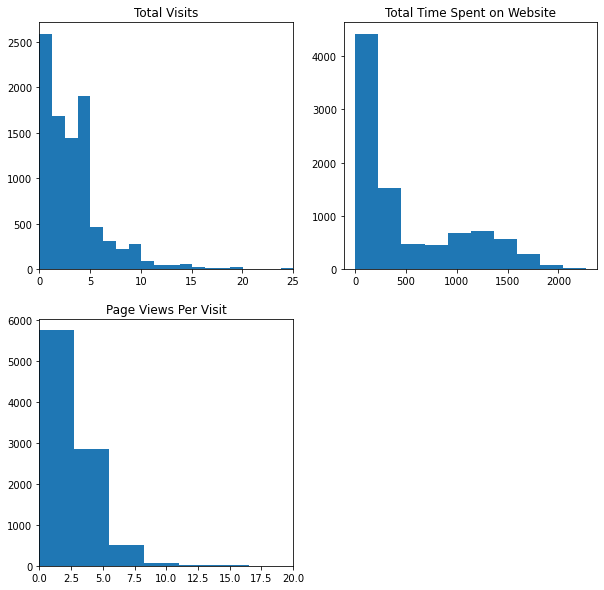

In [49]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.hist(Lead_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(Lead_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(Lead_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

**Relating all the categorical variables to Converted**


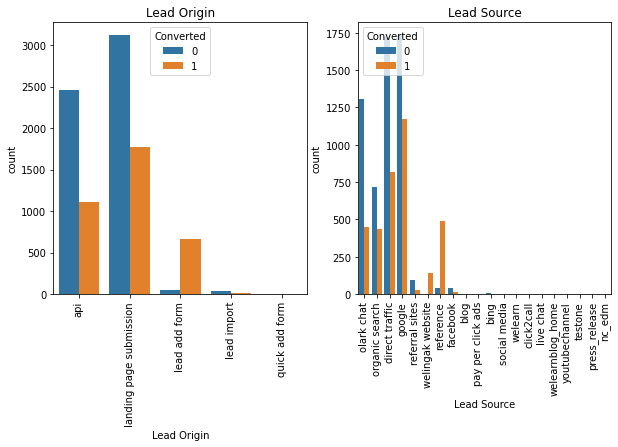

In [50]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Lead_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Lead_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

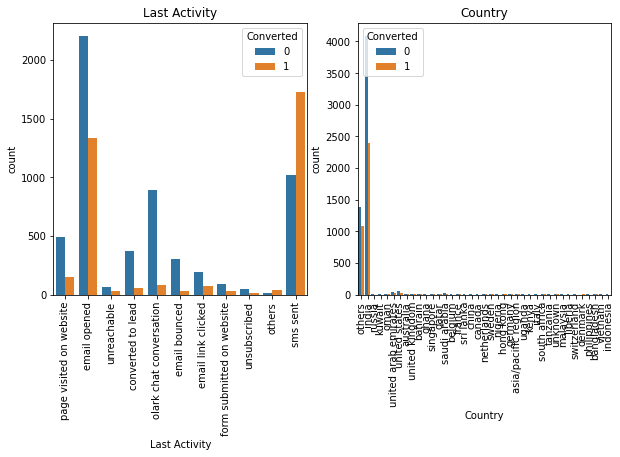

In [51]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Lead_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Lead_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

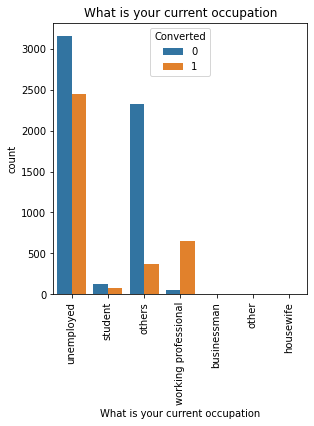

In [52]:
plt.figure(figsize = (10,5))

# plt.subplot(1,2,1)
# sns.countplot(x='Specialization', hue='Converted', data= Lead_final).tick_params(axis='x', rotation = 90)
# plt.title('Specialization')

plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation', hue='Converted', data= Lead_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

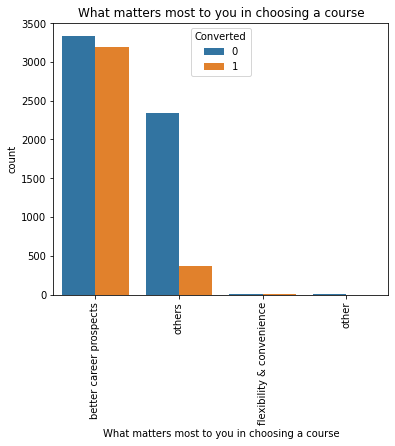

In [53]:
plt.figure(figsize = (6,5))

sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Lead_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.show()

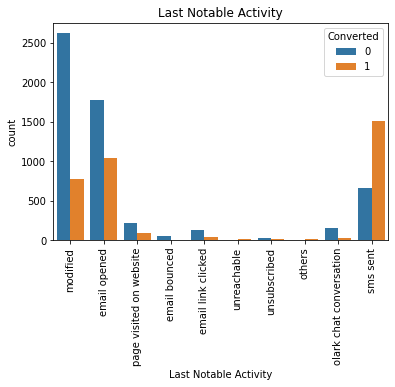

In [54]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= Lead_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

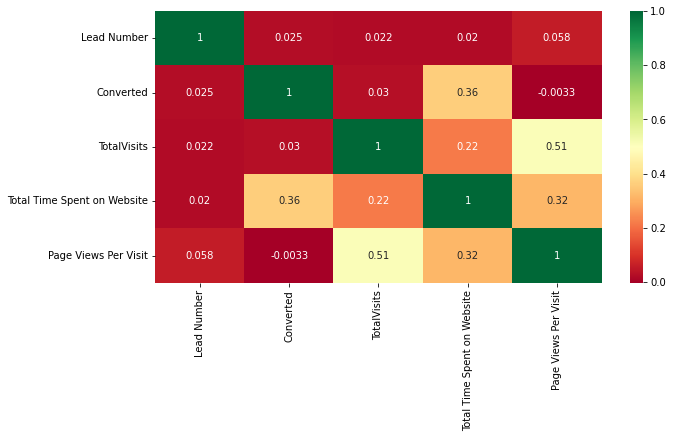

In [55]:
# Compute pairwise correlation of columns, excluding NA/null values
plt.figure(figsize=(10,5))
sns.heatmap(Lead_final.corr(method='pearson'),annot=True,cmap="RdYlGn")
plt.show()

From the above heatmap it is observed that "coverted" column has strong corelation "Total time spent on website" of value 0.36

## **2.b Inspecting the outliers**

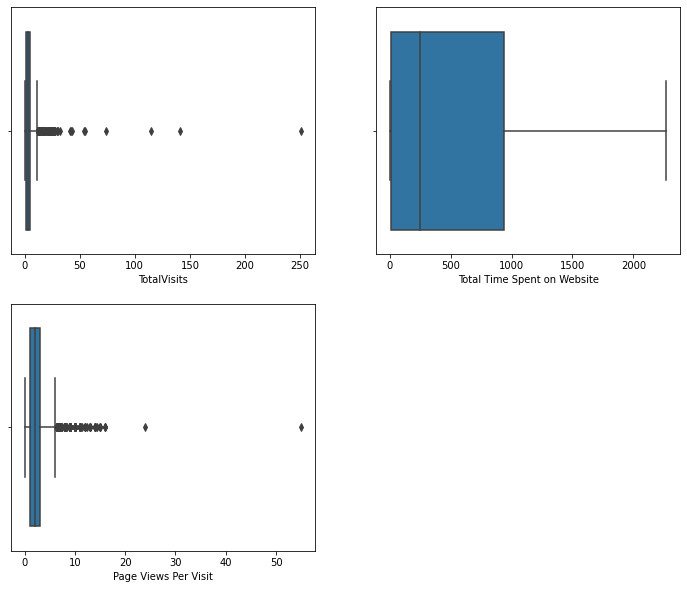

In [56]:
# Box Plot to find the outliers 
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
sns.boxplot('TotalVisits',data = Lead_final)
plt.subplot(2,2,2)
sns.boxplot('Total Time Spent on Website', data = Lead_final)
plt.subplot(2,2,3)
sns.boxplot('Page Views Per Visit',data = Lead_final)
plt.show()

**Here we observe that outliers are present in "Total visits" and " Page views per visit**
**Capping these outliers will help in our analysis**

In [57]:
# Capping Outliers:
columns = ["TotalVisits", "Page Views Per Visit"]
for col in columns:
    percentiles = Lead_final[col].quantile(0.99)
    Lead_final[col][Lead_final[col] >= percentiles] = percentiles

In [58]:
# After capping inspecting the dataframe

numeric = Lead_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.334415,487.698268,2.334429
std,3.228244,548.021466,1.970937
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


## **3. Data Preparation** ##

*  Create dummy variables for all the categorical features.


*   Divide the data to train and test.

*   Perform scaling.


*   Divide the data into X and y




In [59]:
Lead_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

In [60]:
#here we are extracting the categorical columns in data fram
Lead_final.loc[:, Lead_final.dtypes == 'object'].columns


Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [61]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(Lead_final[['Lead Origin','Lead Source','Specialization', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)


In [62]:
# concat the results to the master dataframe
Lead_final_dum = pd.concat([Lead_final, dummy], axis=1)
Lead_final_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 83 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Lead Origin                                           9240 non-null   object 
 2   Lead Source                                           9240 non-null   object 
 3   Converted                                             9240 non-null   int64  
 4   TotalVisits                                           9240 non-null   float64
 5   Total Time Spent on Website                           9240 non-null   int64  
 6   Page Views Per Visit                                  9240 non-null   float64
 7   Last Activity                                         9240 non-null   object 
 8   Country                                               9240

In [63]:
Lead_final_dum = Lead_final_dum.drop(['Lead Origin','Tags','City', 'Lead Source','Last Activity', 'Country', 'Specialization', 'What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
Lead_final_dum.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,...,A free copy of Mastering The Interview_yes,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_others,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## **4. Test Train split** ##

In [64]:
# Import the  library

from sklearn.model_selection import train_test_split

In [65]:
# Segregating the data into X dataframe and y

X = Lead_final_dum.drop(['Converted'], 1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,...,A free copy of Mastering The Interview_yes,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_others,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
# Target variable y is Converted column

y = Lead_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
# Split the dataset into 70% and 30% for train and test respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 4.1 Feature scaling ###

In [68]:
#import required library
from sklearn.preprocessing import StandardScaler


In [69]:
# Instantiate an object
scaler = MinMaxScaler()

# Fit on data

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,...,A free copy of Mastering The Interview_yes,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_others,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
1871,641410,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6795,597687,0.235294,0.214349,0.147778,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3516,626825,0.294118,0.046655,0.277778,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8105,587928,0.294118,0.541373,0.555556,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3934,622366,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [70]:
X_train.describe()


,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,...,A free copy of Mastering The Interview_yes,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_others,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,617186.001546,0.196343,0.212974,0.258259,0.528139,0.079468,0.005102,0.000155,0.000155,0.000464,...,0.311843,0.018398,0.305349,0.367811,0.018553,0.002319,0.035869,0.237477,0.003247,0.004793
std,23372.003514,0.191614,0.240566,0.218226,0.499246,0.270489,0.071252,0.012434,0.012434,0.021533,...,0.463282,0.134397,0.460591,0.482247,0.134950,0.048105,0.185978,0.425570,0.056892,0.069069
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596516.250000,0.058824,0.005282,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615720.500000,0.176471,0.108275,0.222222,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637348.750000,0.294118,0.407790,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,660728.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


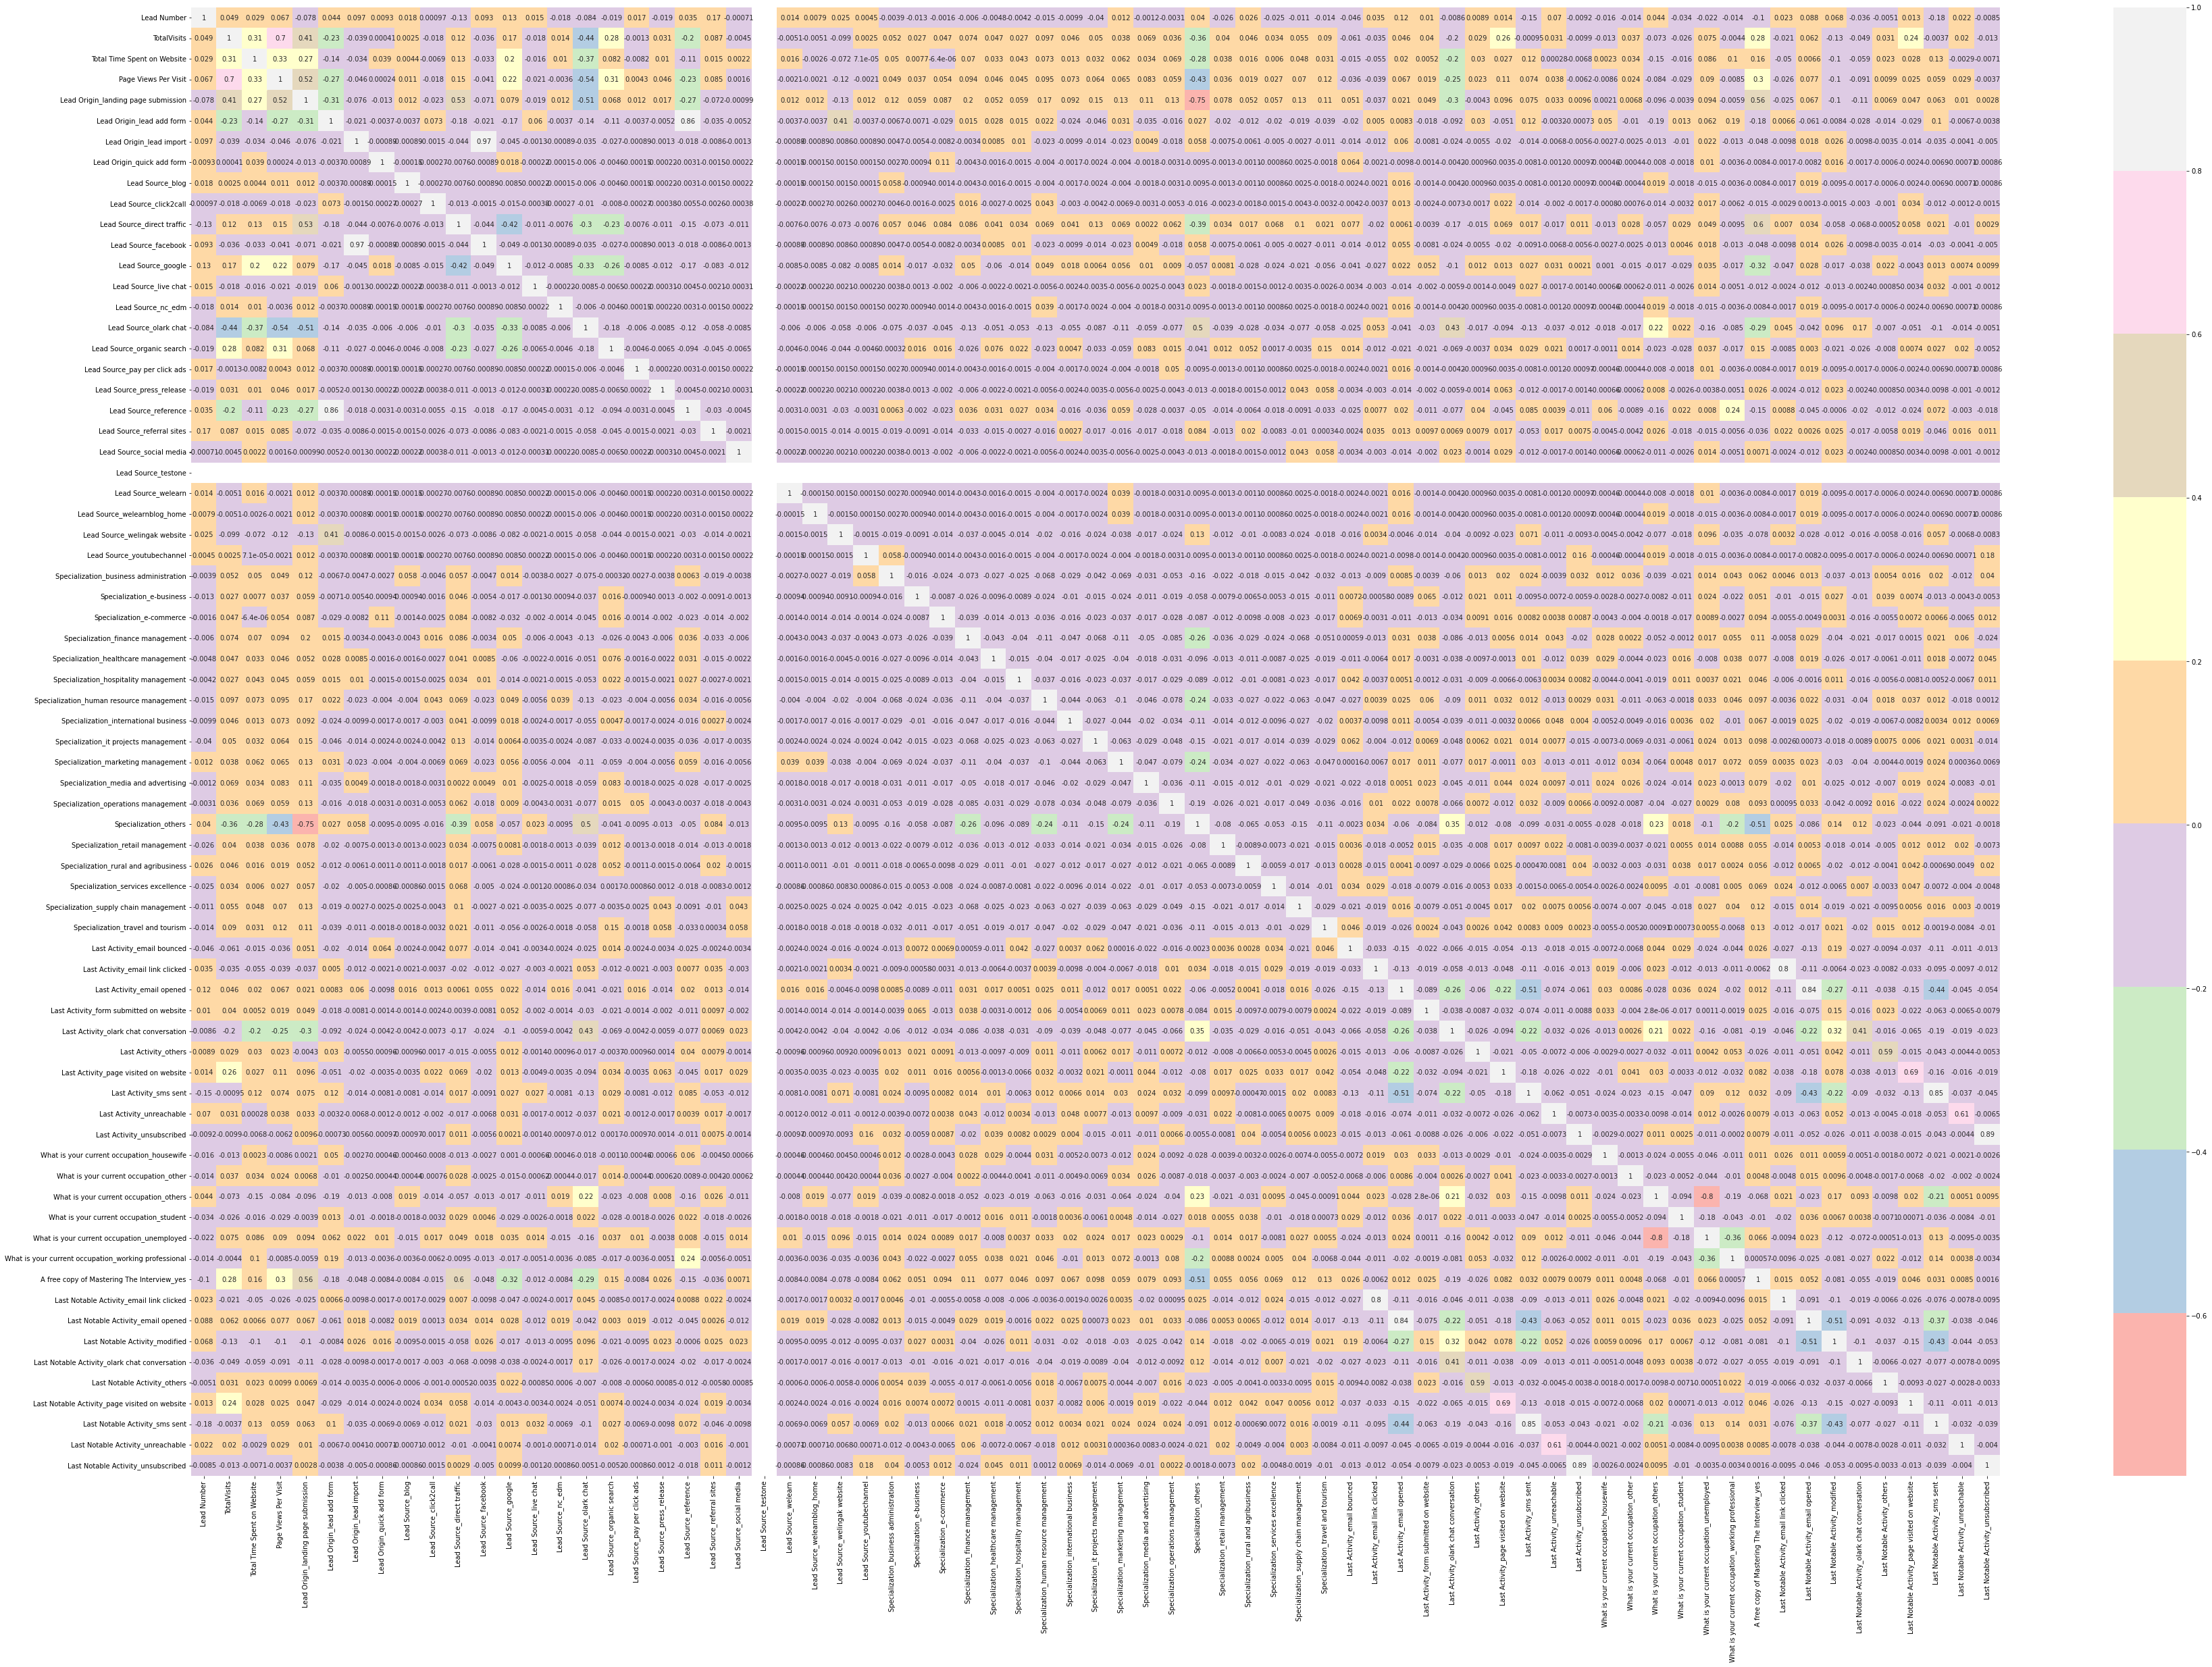

In [71]:
# To check the correlation among varibles in train dataset
plt.figure(figsize=(60,40))
sns.heatmap(X_train.corr(),annot=True,cmap="Pastel1")
plt.show()

In [72]:
X_train.shape


(6468, 71)

**Since there are a lot of variables (82) it is difficult for data modeling and evaluation so, we can do it after RFE**


## **5. Data Modelling and Evaluation** ##

*  Create Linear Regression model using mixed approach.
*   Check the various assumptions.
*   Check the Adjusted R-Square for both test and train data.
*  Report the final model.




In [73]:
# Multilinear Regression using RFE
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)

# columns selected using RFE and displaying the columns along with there rank
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Number', False, 36),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 7),
 ('Lead Origin_quick add form', True, 1),
 ('Lead Source_blog', True, 1),
 ('Lead Source_click2call', True, 1),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead Source_live chat', False, 5),
 ('Lead Source_nc_edm', True, 1),
 ('Lead Source_olark chat', False, 17),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_pay per click ads', True, 1),
 ('Lead Source_press_release', True, 1),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_social media', True, 1),
 ('Lead Source_testone', False, 37),
 ('Lead Source_welearn', True, 1),
 ('Lead Source_welearnblog_home', True, 1),
 ('Lead Source_welingak website', 

In [74]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_quick add form', 'Lead Source_blog',
       'Lead Source_click2call', 'Lead Source_direct traffic',
       'Lead Source_facebook', 'Lead Source_google', 'Lead Source_nc_edm',
       'Lead Source_organic search', 'Lead Source_pay per click ads',
       'Lead Source_press_release', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_social media',
       'Lead Source_welearn', 'Lead Source_welearnblog_home',
       'Lead Source_welingak website', 'Lead Source_youtubechannel',
       'Specialization_hospitality management', 'Specialization_others',
       'Specialization_retail management',
       'Specialization_rural and agribusiness', 'Last Activity_email opened',
       'Last Activity_others', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your cu

In [75]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'Lead Origin_lead import', 'Lead Source_live chat',
       'Lead Source_olark chat', 'Lead Source_testone',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_services excellence',
       'Specialization_supply chain management',
       'Specialization_travel and tourism', 'Last Activity_email bounced',
       'Last Activity_email link clicked',
       'Last Activity_form submitted on website',
       'Last Activity_olark chat conversation',
       'Last Activity_page visited on website', 'Last Activity_unreachable'

## **5.1  Building model using stats model** ##

In [76]:
# creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [77]:
# Adding the constant to train data set
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [78]:
# Create the Model
lm = sm.OLS(y_train,X_train_rfe1)

In [79]:
# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     147.5
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:02:49   Log-Likelihood:                -2601.4
No. Observations:                6468   AIC:                             5275.
Df Residuals:                    6432   BIC:                             5519.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [80]:
# Variance Inflation factor (VIF) for the X_train Data set
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_lead add form,17.76
15,Lead Source_reference,14.71
3,Lead Origin_landing page submission,6.54
2,Page Views Per Visit,6.44
28,Last Activity_sms sent,5.87
33,Last Notable Activity_sms sent,4.93
8,Lead Source_direct traffic,4.70
10,Lead Source_google,4.29
20,Lead Source_welingak website,4.19
0,TotalVisits,4.18


In [81]:
# Dropping the column having p value greater

X_train_new = X_train_rfe.drop('Lead Origin_quick add form',axis=1)

In [82]:
# Adding the constant to train data set
X_train_rfe1 = sm.add_constant(X_train_new)

# Recreate the Model after droping the column: Humidity (hum)
lm = sm.OLS(y_train,X_train_rfe1)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     151.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:02:50   Log-Likelihood:                -2601.4
No. Observations:                6468   AIC:                             5273.
Df Residuals:                    6433   BIC:                             5510.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [83]:
# Variance Inflation factor (VIF) for the X_train Data set after dropping the column
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values,i)for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_lead add form,17.76
14,Lead Source_reference,14.71
3,Lead Origin_landing page submission,6.53
2,Page Views Per Visit,6.44
27,Last Activity_sms sent,5.87
32,Last Notable Activity_sms sent,4.93
7,Lead Source_direct traffic,4.70
9,Lead Source_google,4.28
19,Lead Source_welingak website,4.19
0,TotalVisits,4.18


In [84]:
# drop Lead Source_social media	
# Drop the variable Lead Source_social media is having 0.646 p value
X_train_new2 = X_train_new.drop('Lead Source_social media',axis=1)

In [85]:
# Adding the constant to train data set
X_train_rfe2 = sm.add_constant(X_train_new2)

# Recreate the Model after droping the column
lm = sm.OLS(y_train,X_train_rfe2)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     156.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:02:51   Log-Likelihood:                -2601.5
No. Observations:                6468   AIC:                             5271.
Df Residuals:                    6434   BIC:                             5501.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF']= [variance_inflation_factor(X_train_new2.values,i)for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_lead add form,17.76
14,Lead Source_reference,14.71
3,Lead Origin_landing page submission,6.53
2,Page Views Per Visit,6.43
26,Last Activity_sms sent,5.87
31,Last Notable Activity_sms sent,4.93
7,Lead Source_direct traffic,4.69
9,Lead Source_google,4.28
18,Lead Source_welingak website,4.19
0,TotalVisits,4.18


In [87]:
# Drop the variable Lead Source_youtubechannel is having 0.571 p value
X_train_new3 = X_train_new2.drop('Lead Source_youtubechannel',axis=1)

In [88]:
# Adding the constant to train data set
X_train_rfe3 = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_rfe3)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:02:52   Log-Likelihood:                -2601.7
No. Observations:                6468   AIC:                             5269.
Df Residuals:                    6435   BIC:                             5493.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [89]:
# Variance Inflation factor (VIF) for the X_train Data set
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF']= [variance_inflation_factor(X_train_new3.values,i)for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_lead add form,17.76
14,Lead Source_reference,14.71
3,Lead Origin_landing page submission,6.52
2,Page Views Per Visit,6.43
25,Last Activity_sms sent,5.87
30,Last Notable Activity_sms sent,4.93
7,Lead Source_direct traffic,4.68
9,Lead Source_google,4.27
18,Lead Source_welingak website,4.19
0,TotalVisits,4.18


In [90]:
X_train_new4 = X_train_new3.drop('Lead Source_welearnblog_home',axis =1)


In [91]:
# Adding the constant to train data set
X_train_rfe4 = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_rfe4)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     166.5
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:02:53   Log-Likelihood:                -2602.0
No. Observations:                6468   AIC:                             5268.
Df Residuals:                    6436   BIC:                             5485.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF']= [variance_inflation_factor(X_train_new4.values,i)for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_lead add form,17.75
14,Lead Source_reference,14.71
3,Lead Origin_landing page submission,6.51
2,Page Views Per Visit,6.43
24,Last Activity_sms sent,5.87
29,Last Notable Activity_sms sent,4.93
7,Lead Source_direct traffic,4.68
9,Lead Source_google,4.27
17,Lead Source_welingak website,4.19
0,TotalVisits,4.18


In [93]:
X_train_new5 = X_train_new4.drop('Lead Source_referral sites',axis =1)
#drop

In [94]:
# Adding the constant to train data set
X_train_rfe5 = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_rfe5)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     171.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:02:54   Log-Likelihood:                -2608.4
No. Observations:                6468   AIC:                             5279.
Df Residuals:                    6437   BIC:                             5489.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [95]:
# Variance Inflation factor (VIF) for the X_train Data set 
vif = pd.DataFrame()
vif['Features'] = X_train_new5.columns
vif['VIF']= [variance_inflation_factor(X_train_new5.values,i)for i in range(X_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_lead add form,17.74
14,Lead Source_reference,14.67
3,Lead Origin_landing page submission,6.46
2,Page Views Per Visit,6.23
23,Last Activity_sms sent,5.87
28,Last Notable Activity_sms sent,4.93
7,Lead Source_direct traffic,4.38
16,Lead Source_welingak website,4.18
0,TotalVisits,4.14
9,Lead Source_google,3.89


In [96]:
X_train_new6 = X_train_new5.drop('Lead Source_blog',axis =1)

In [97]:
# Adding the constant to train data set
X_train_rfe6 = sm.add_constant(X_train_new6)

lm = sm.OLS(y_train,X_train_rfe6)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     177.2
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:02:55   Log-Likelihood:                -2608.9
No. Observations:                6468   AIC:                             5278.
Df Residuals:                    6438   BIC:                             5481.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train_new6.columns
vif['VIF']= [variance_inflation_factor(X_train_new6.values,i)for i in range(X_train_new6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_lead add form,17.74
13,Lead Source_reference,14.67
3,Lead Origin_landing page submission,6.46
2,Page Views Per Visit,6.22
22,Last Activity_sms sent,5.87
27,Last Notable Activity_sms sent,4.93
6,Lead Source_direct traffic,4.38
15,Lead Source_welingak website,4.18
0,TotalVisits,4.14
8,Lead Source_google,3.89


In [99]:
X_train_new7 = X_train_new6.drop('Lead Source_pay per click ads',axis =1)

In [100]:
# Adding the constant to train data set
X_train_rfe7 = sm.add_constant(X_train_new7)

lm = sm.OLS(y_train,X_train_rfe7)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     183.5
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:02:56   Log-Likelihood:                -2609.2
No. Observations:                6468   AIC:                             5276.
Df Residuals:                    6439   BIC:                             5473.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train_new7.columns
vif['VIF']= [variance_inflation_factor(X_train_new7.values,i)for i in range(X_train_new7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_lead add form,17.74
12,Lead Source_reference,14.67
3,Lead Origin_landing page submission,6.45
2,Page Views Per Visit,6.22
21,Last Activity_sms sent,5.87
26,Last Notable Activity_sms sent,4.93
6,Lead Source_direct traffic,4.37
14,Lead Source_welingak website,4.18
0,TotalVisits,4.14
8,Lead Source_google,3.88


In [102]:
X_train_new8 = X_train_new7.drop('Lead Source_welearn',axis =1)


In [103]:
# Adding the constant to train data set
X_train_rfe8 = sm.add_constant(X_train_new8)

lm = sm.OLS(y_train,X_train_rfe8)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:02:57   Log-Likelihood:                -2609.7
No. Observations:                6468   AIC:                             5275.
Df Residuals:                    6440   BIC:                             5465.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train_new8.columns
vif['VIF']= [variance_inflation_factor(X_train_new8.values,i)for i in range(X_train_new8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_lead add form,17.74
12,Lead Source_reference,14.67
3,Lead Origin_landing page submission,6.44
2,Page Views Per Visit,6.22
20,Last Activity_sms sent,5.87
25,Last Notable Activity_sms sent,4.93
6,Lead Source_direct traffic,4.36
13,Lead Source_welingak website,4.18
0,TotalVisits,4.14
8,Lead Source_google,3.88


In [105]:
X_train_new9 = X_train_new8.drop('Lead Source_click2call',axis =1)
#drop

In [106]:
X_train_rfe9 = sm.add_constant(X_train_new9)

lm = sm.OLS(y_train,X_train_rfe9)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     197.6
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:02:57   Log-Likelihood:                -2610.2
No. Observations:                6468   AIC:                             5274.
Df Residuals:                    6441   BIC:                             5457.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train_new9.columns
vif['VIF']= [variance_inflation_factor(X_train_new9.values,i)for i in range(X_train_new9.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_lead add form,16.07
11,Lead Source_reference,13.38
3,Lead Origin_landing page submission,6.44
2,Page Views Per Visit,6.22
19,Last Activity_sms sent,5.87
24,Last Notable Activity_sms sent,4.93
5,Lead Source_direct traffic,4.36
0,TotalVisits,4.14
12,Lead Source_welingak website,3.88
7,Lead Source_google,3.87


In [108]:
X_train_new10 = X_train_new9.drop('Lead Source_press_release',axis =1)


In [109]:
X_train_rfe10 = sm.add_constant(X_train_new10)

lm = sm.OLS(y_train,X_train_rfe10)

# fit 
lm = lm.fit()

# summary of linear model
print('Summary of Linear Model: \n',lm.summary())

Summary of Linear Model: 
                             OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     205.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:02:58   Log-Likelihood:                -2610.8
No. Observations:                6468   AIC:                             5274.
Df Residuals:                    6442   BIC:                             5450.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train_new10.columns
vif['VIF']= [variance_inflation_factor(X_train_new10.values,i)for i in range(X_train_new10.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_lead add form,16.06
10,Lead Source_reference,13.38
3,Lead Origin_landing page submission,6.43
2,Page Views Per Visit,6.20
18,Last Activity_sms sent,5.87
23,Last Notable Activity_sms sent,4.93
5,Lead Source_direct traffic,4.34
0,TotalVisits,4.14
11,Lead Source_welingak website,3.88
7,Lead Source_google,3.85


## **6.Model Prediction** ##

**Residual analysis of Train data**

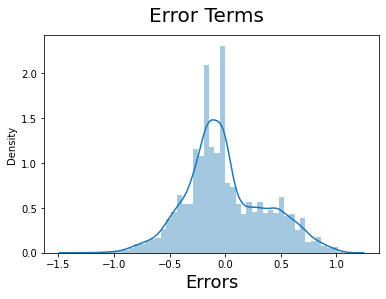

In [111]:
y_train_pred = lm.predict(X_train_rfe10)
# calculate the residual and ploting the distribution curve 
res = y_train - y_train_pred
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel("Errors",fontsize = 18)
plt.show()

In [112]:
# Predicting the probabilities on the train set
y_train_pred[:10]

1871    0.427579
6795    0.176373
3516    0.323983
8105    0.764917
3934    0.289454
4844    1.138396
3297    0.268780
8071    1.178965
987     0.259875
7423    0.915245
dtype: float64

In [113]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.42757889, 0.17637278, 0.32398287, 0.7649165 , 0.28945436,
       1.13839602, 0.26877969, 1.17896477, 0.25987522, 0.91524528])

In [114]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.427579
1,0,0.176373
2,0,0.323983
3,0,0.764917
4,0,0.289454


In [115]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.427579,0
1,0,0.176373,0
2,0,0.323983,0
3,0,0.764917,1
4,0,0.289454,0


Text(0, 0.5, 'y_pred')

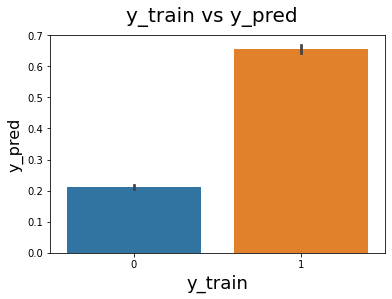

In [116]:
# plotting y_train  and y_train_pred to understand the spread
fig = plt.figure()
sns.barplot(y_train,y_train_pred)
#sns.regplot(y_train,y_train_pred)
fig.suptitle('y_train vs y_pred',fontsize = 20)
plt.xlabel('y_train', fontsize = 18)
plt.ylabel('y_pred',fontsize = 16)

## **7. Model Evaluation** ##

In [117]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3577,  425],
       [ 726, 1740]])

In [118]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8220470006184292

**The accuracy of the model is 82% and it is a good model**

In [119]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [120]:
# Calculating the sensitivity
TP/(TP+FN)

0.7055961070559611

In [121]:
# Calculating the specificity
TN/(TN+FP)

0.8938030984507747

With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 70.55% and specificity of around 89.38%.


## **8. Optimise Cutoff - ROC Curve** ##

In [122]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


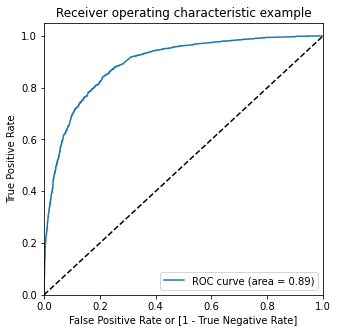

In [124]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**The area under ROC Curve is 0.89 and it is good value**

In [125]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.427579,0,1,1,1,1,1,0,0,0,0,0
1,0,0.176373,0,1,1,0,0,0,0,0,0,0,0
2,0,0.323983,0,1,1,1,1,0,0,0,0,0,0
3,0,0.764917,1,1,1,1,1,1,1,1,1,0,0
4,0,0.289454,0,1,1,1,0,0,0,0,0,0,0


In [126]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df   

,prob,accuracy,sensi,speci
0.0,0.0,0.438466,0.998783,0.093203
0.1,0.1,0.579932,0.981752,0.332334
0.2,0.2,0.720315,0.947689,0.580210
0.3,0.3,0.790198,0.885239,0.731634
0.4,0.4,0.812616,0.806975,0.816092
0.5,0.5,0.822047,0.705596,0.893803
0.6,0.6,0.796228,0.558800,0.942529
0.7,0.7,0.767316,0.442417,0.967516
0.8,0.8,0.723098,0.296837,0.985757
0.9,0.9,0.691404,0.199108,0.994753


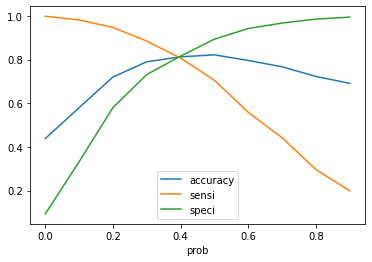

In [127]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the graph it is visible that the optimal cut off is at 0.37**


In [128]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.40 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.427579,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.176373,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323983,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.764917,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.289454,0,1,1,1,0,0,0,0,0,0,0,0


In [129]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8126159554730983

In [130]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3266,  736],
       [ 476, 1990]])

In [131]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [132]:
# Calculating the sensitivity
TP/(TP+FN)

0.8069748580697486

In [133]:
# Calculating the specificity
TN/(TN+FP)

0.8160919540229885

**With the current cut off as 0.37 we have accuracy: 81.26%, sensitivity: 80.69% and specificity of around 81.60%.**


## **9. Prediction on Test set** ##


In [134]:
# list of numaric variables
num_vars=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

# transform 
X_test[num_vars]=scaler.transform(X_test[num_vars])

# checking the variables after transforming data using train data set 
print('Scaling of Test Data set:  \n ',X_test[num_vars].describe()) 

Scaling of Test Data set:  
         TotalVisits  Page Views Per Visit  Total Time Spent on Website
count  2772.000000           2772.000000                  2772.000000
mean      0.195674              0.262000                     0.218582
std       0.185862              0.220791                     0.242693
min       0.000000              0.000000                     0.000000
25%       0.058824              0.111111                     0.005722
50%       0.176471              0.222222                     0.113556
75%       0.294118              0.388889                     0.417694
max       1.000000              1.000000                     0.991637


We can observe that, the maximum value of test data variables are near about 1 or slightly above 1, but not exactly 1. Because the MinMaxScaler was fit and transform on train data set and later we are tranforming it on test data. Hence its max values are near about 1 but not exactly 1

In [135]:
# Substituting all the columns in the final train model
col = X_train_new10.columns

In [136]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           2772 non-null   float64
 1   Total Time Spent on Website                           2772 non-null   float64
 2   Page Views Per Visit                                  2772 non-null   float64
 3   Lead Origin_landing page submission                   2772 non-null   uint8  
 4   Lead Origin_lead add form                             2772 non-null   uint8  
 5   Lead Source_direct traffic                            2772 non-null   uint8  
 6   Lead Source_facebook                                  2772 non-null   uint8  
 7   Lead Source_google                                    2772 non-null   uint8  
 8   Lead Source_nc_edm                                    2

In [137]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = lm.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.439628
1,1,0.793893
2,1,0.858015
3,0,0.154139
4,1,0.702420


In [138]:
# Making prediction using cut off 0.37
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.439628,1
1,1,0.793893,1
2,1,0.858015,1
3,0,0.154139,0
4,1,0.702420,1
...,...,...,...
2767,0,0.108004,0
2768,1,0.805590,1
2769,0,0.289454,0
2770,0,0.340862,0


In [139]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8138528138528138

In [140]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1380,  297],
       [ 219,  876]])

In [141]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [142]:
# Calculating the sensitivity
TP/(TP+FN)

0.8

In [143]:
# Calculating the specificity
TN/(TN+FP)

0.8228980322003577

With the current cut off as 0.40 we have accuracy: 81.38%, sensitivity:80% and specificity of around 82.22%.


## **10.Precision-Recall** ##

In [144]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion


array([[3577,  425],
       [ 726, 1740]])

In [145]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8036951501154734

In [146]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7055961070559611

With the current cut off as 0.40 we have Precision around 80.36% and Recall around 70.55%


**Precision and recall tradeoff**


In [147]:
from sklearn.metrics import precision_recall_curve

In [148]:
y_train_pred_final.Converted, y_train_pred_final.Predicted


(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


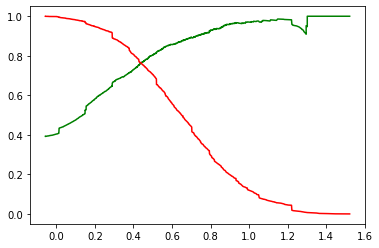

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**From the above plot we can predict the cut off 0.43**


In [151]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.427579,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.176373,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323983,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.764917,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.289454,0,1,1,1,0,0,0,0,0,0,0,0


In [152]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8164811379097093

In [153]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3383,  619],
       [ 568, 1898]])

In [154]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [155]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.754072308303536

In [156]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7696674776966748

With the current cut off as 0.43 we have Precision around 75.40% and Recall around 76.96%


## **11.Conclusion** ##

From model, we can conclude following points:

**Focus on**
*   The Total time spend on the website.
*   Total number of visits.
*   When the lead source was:
    a. Google
    b. Direct traffic
    c. Organic search
*    We must majorly focus on leads whose last activity is SMS sent or Email opened
*   The customer/leads who fills the form are the potential leads.
*   We must majorly focus on working professionals
*   It’s better to focus least on customers to whom the sent mail is bounced back.

**Focus Less**
 
*   If the lead source is referral, he/she may not be the potential lead.
*   If the lead didn’t fill specialization, he/she may not know what to study and are not right people to target
*   Page Views Per Visit
So, it’s better to focus less on such cases. 